In [1]:
import numpy as np
from scipy import signal
import scipy.io.wavfile
import matplotlib.pyplot as plt
import math
from IPython.display import Audio

In [2]:
sourceFilesPrefix="ExpectedResults//music-"

rate1, sample1_data = scipy.io.wavfile.read(sourceFilesPrefix+"1.wav")
rate2, sample2_data=scipy.io.wavfile.read(sourceFilesPrefix+"2.wav")

In [3]:
def sigmoid(y):
    #g=np.zeros(y.shape)
    g=np.divide(1,np.add(1,np.exp(-y)))
    #print(g)
    return g

def gradient(eta, Y, W):
    delW=np.zeros(W.shape)
    Z=sigmoid(Y)
    Id=np.identity(Y.shape[0])
    grad=eta*(Id+np.dot((1-2*Z),Y.T))*W
    return grad

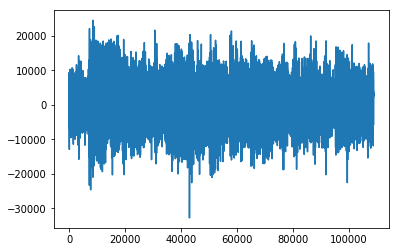

In [4]:
plt.figure()
plt.plot(sample1_data)
plt.show()
Audio(data=sample1_data, rate=16000)

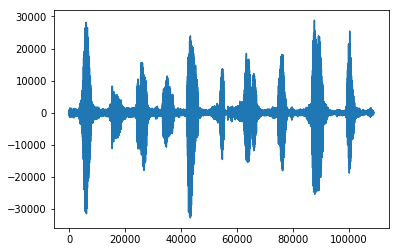

In [5]:
plt.figure()
plt.plot(sample2_data)
plt.show()
Audio(data=sample2_data, rate=16000)

In [6]:
med1=sample1_data.std(axis=0)
s1data= sample1_data/med1
med2=sample2_data.std(axis=0)
s2data=sample2_data/med2
orig=np.matrix([s1data,s2data])

n=len(orig)
#A=np.random.random([n,n])
A=np.matrix([[0.15270211,0.08406566],
             [0.90514896,0.53725471]])
print("Mixing matrix: \n"+str(A))

X=np.dot(A,orig)


Mixing matrix: 
[[ 0.15270211  0.08406566]
 [ 0.90514896  0.53725471]]


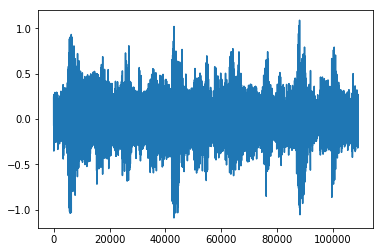

In [7]:
plt.figure()
plt.plot(X[0].T)
plt.show()

In [8]:
Audio(data=X[0], rate=16000)

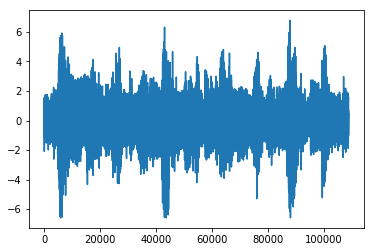

In [9]:
plt.figure()
plt.plot(X[1].T)
plt.show()

In [10]:
Audio(data=X[1], rate=16000)

In [11]:
corr=1
while abs(corr)>=4e-6:
    eta=0.01
    eta0=eta
    T=1000
    num_iter=10000

    W=np.random.random([n,n])/100
    print("Initial guessed decomposition matrix: \n"+str(W))
    for i in range(0,num_iter):
        Y=np.dot(W,X)
        delW=gradient(eta,Y,W)
        aux=W+delW
        W=aux
        eta=eta0/(1+(i/T))
    Y2=np.dot(W,X)
    #corr=np.correlate(np.ravel(Y2[0]),np.ravel(Y2[1]))
    corr=np.corrcoef(Y2)[1][0]
    print(corr)
print(eta)

Initial guessed decomposition matrix: 
[[ 0.00828584  0.00493014]
 [ 0.0060418   0.00668162]]
-5.83274690087e-06
Initial guessed decomposition matrix: 
[[ 0.00601663  0.00264417]
 [ 0.00191364  0.00391959]]
-5.5234448565e-06
Initial guessed decomposition matrix: 
[[ 0.00676645  0.00827631]
 [ 0.0099402   0.00196867]]
-8.6107124536e-06
Initial guessed decomposition matrix: 
[[ 0.00149891  0.00133138]
 [ 0.008625    0.00519716]]
4.75656125113e-06
Initial guessed decomposition matrix: 
[[ 0.00112061  0.00081259]
 [ 0.0086022   0.00771932]]
-8.3771729482e-06
Initial guessed decomposition matrix: 
[[ 0.00754797  0.00228952]
 [ 0.00765126  0.00306488]]
-5.92291268751e-06
Initial guessed decomposition matrix: 
[[ 0.00766414  0.00648014]
 [ 0.00694645  0.00053703]]
-8.75251635585e-06
Initial guessed decomposition matrix: 
[[ 0.00646187  0.00924248]
 [ 0.00449358  0.00254129]]
-8.76030419345e-06
Initial guessed decomposition matrix: 
[[ 0.00156176  0.00272338]
 [ 0.00242038  0.00237711]]
-4.935

[[-0.58666547  0.09968334]
 [ 0.48046074 -0.07637486]]


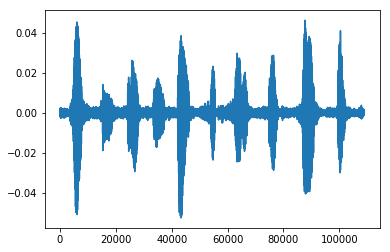

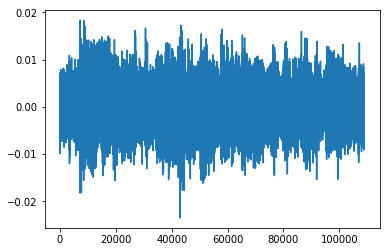

In [12]:
print(W)
Y2=np.dot(W,X)
plt.figure()
plt.plot(Y2[0].T)
plt.show()
plt.figure()
plt.plot(Y2[1].T)
plt.show()

In [13]:
Audio(data=Y2[0], rate=16000)

In [14]:
Audio(data=Y2[1], rate=16000)